In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../Style.mplstyle')
import matplotlib as mpl
import pandas as pd
import os
import sys
import scipy
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from calculations import *

In [2]:
parent_path = '../../../../'
path = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/Lund/'

SMPS = read_SMPS(path, parent_path, [0, 0])
OPS_APS = read_OPS(path, parent_path, 0)

NS_dict_keys = ['2024-10-15_NanoScan', '2024-10-16_NanoScan', '2024-10-17_NanoScan']
NS_bins = SMPS['2024-10-21_NanoScan'].keys()[3:16].to_list()

NS_bg_mean, NS_bg_std, NS_bg_error = bin_mean(['2024/10/21 11:45:00', '2024/10/21 14:10:00'], 
                                              SMPS['2024-10-21_NanoScan'], NS_bins, 'Time', 0.1)

for key in NS_dict_keys:
    df = SMPS[key]
    for i, bin in enumerate(NS_bins):
        df[bin] = df[bin] - NS_bg_mean[i]

    SMPS[key] = df

OPS_dict_keys = ['Exp1', 'Exp2', 'Exp3', 'Exp4']
OPS_mid_point = [0.337, 0.419, 0.522, 0.650, 0.809, 1.007, 1.254, 1.562, 1.944, 2.421, 3.014, 3.752, 4.672, 5.816, 7.241, 9.015]
OPS_cut_point = [0.300, 0.374, 0.465, 0.579, 0.721, 0.897, 1.117, 1.391, 1.732, 2.156, 2.685, 3.343, 4.162, 5.182, 6.451, 8.031, 10.000]
OPS_bins = OPS_APS['Exp1'].keys()[1:17].to_list()

OPS_mass_conc = {}
for key in OPS_dict_keys:
    mass_conc = calc_mass_conc(OPS_APS[key], OPS_bins, OPS_mid_point, 1.2)
    OPS_mass_conc[key] = mass_conc

APS_dict_keys = ['20241016_APS', '20241016_APS_2_exp', '20241017_APS', '20241017_APS']
APS_bins = OPS_APS['20241016_APS'].keys()[2:53].to_list()
APS_bin_mean = []
for key in OPS_APS['20241016_APS'].keys()[2:53]:
    APS_bin_mean.append(float(key))
    OPS_APS['20241016_APS'][key] = pd.to_numeric(OPS_APS['20241016_APS'][key], errors='coerce') * 1.2

APS_mass_conc = {}
APS_mass_conc['20241016_APS'] = OPS_APS['20241016_APS']
for key in APS_dict_keys[1:]:
    mass_conc = calc_mass_conc(OPS_APS[key], APS_bins, APS_bin_mean, 1.2)
    APS_mass_conc[key] = mass_conc

APS_number = pd.DataFrame({'Time': OPS_APS['20241016_APS']['Time']})
for i, key in enumerate(APS_bins):
    # Ensure df[key] is numeric
    OPS_APS['20241016_APS'][key] = pd.to_numeric(OPS_APS['20241016_APS'][key], errors='coerce')
    
    APS_number[key] = OPS_APS['20241016_APS'][key] / ((1.2 / 10**6) * (np.pi / 6) * APS_bin_mean[i]**3 * 10**6) # in #/cm**3
OPS_APS['20241016_APS'] = APS_number

Failed to read file with separation: 	
Failed to read file with separation: ,
Failed to read file with separation: ,
Failed to read file with separation: 	
Failed to read file with separation: ,
Failed to read file with separation: ,


In [3]:
def bin_edges(d_min, bin_mid):
    bins_list = [d_min]

    for i, bin in enumerate(bin_mid):
        bin_max = bin*2 - bins_list[i] 
        bins_list.append(bin_max)
    
    return bins_list

APS_cut_point = bin_edges(0.486968, APS_bin_mean)
print(APS_cut_point)

[0.486968, 0.597032, 0.5689679999999999, 0.6830320000000001, 0.662968, 0.783032, 0.7709680000000001, 0.8990319999999998, 0.8969680000000002, 1.0330319999999997, 1.0409680000000001, 1.187032, 1.206968, 1.365032, 1.3989679999999998, 1.5730320000000002, 1.618968, 1.8110320000000002, 1.8749679999999997, 2.0870320000000007, 2.1709679999999993, 2.4050320000000003, 2.510968, 2.7730319999999997, 2.904968, 3.197032, 3.358968, 3.6870320000000003, 3.8849679999999998, 4.2510319999999995, 4.490968000000001, 4.905031999999999, 5.190968000000001, 5.659031999999999, 5.9989680000000005, 6.529032, 6.9349680000000005, 7.5330319999999995, 8.014968, 8.693031999999999, 9.260968000000002, 10.033031999999999, 10.706968, 11.573032000000001, 12.366968, 13.353031999999999, 14.286968000000002, 15.433031999999997, 16.486968000000005, 17.813031999999993, 19.046968000000007, 20.57303199999999]


In [4]:
timestamps_BG_before = [['2024-10-16 10:16:00', '2024-10-16 10:26:00'],
                        ['2024-10-16 14:43:00', '2024-10-16 14:54:00'],
                        ['2024-10-17 09:48:00', '2024-10-17 10:00:00'],
                        ['2024-10-17 13:16:00', '2024-10-17 13:26:00']]

timestamps_increase = [['2024-10-16 10:26:00', '2024-10-16 10:45:00'],
                       ['2024-10-16 14:54:00', '2024-10-16 15:00:00'],
                       ['2024-10-17 10:00:00', '2024-10-17 10:20:00'],
                       ['2024-10-17 14:19:00', '2024-10-17 14:30:00']]

timestamps_exp = [['2024-10-16 10:45:00', '2024-10-16 12:26:00'],
                  ['2024-10-16 15:00:00', '2024-10-16 15:34:00'],
                  ['2024-10-17 10:20:00', '2024-10-17 12:01:00'],
                  ['2024-10-17 14:30:00', '2024-10-17 15:01:00']]

ax_labels = ['Particle diameter / $\mu$m', 'dN/dlogDp, cm$^{-3}$', 'dM/dlogDp, $\mu$g/m$^{3}$']

In [5]:
OPS_running_number = {}
OPS_running_mass = {}
for i, key in enumerate(OPS_dict_keys):
    mean_number, std, errors = bin_mean(timestamps_BG_before[i], OPS_APS[key], OPS_bins, 'Time', None)
    bg_number = pd.DataFrame({'Background': mean_number}).T
    bg_number.columns = OPS_bins
    exp_number = running_mean(OPS_APS[key], None, OPS_bins, 'Time', '10T', 10, timestamps_exp[i])
    OPS_running_number[key] = pd.concat([bg_number, exp_number]).T
    mean_mass, std, errors = bin_mean(timestamps_BG_before[i], OPS_mass_conc[key], OPS_bins, 'Time', None)
    bg_mass = pd.DataFrame({'Background': mean_mass}).T
    bg_mass.columns = OPS_bins
    exp_mass = running_mean(OPS_mass_conc[key], None, OPS_bins, 'Time', '10T', 10, timestamps_exp[i])
    OPS_running_mass[key] = pd.concat([bg_mass, exp_mass]).T

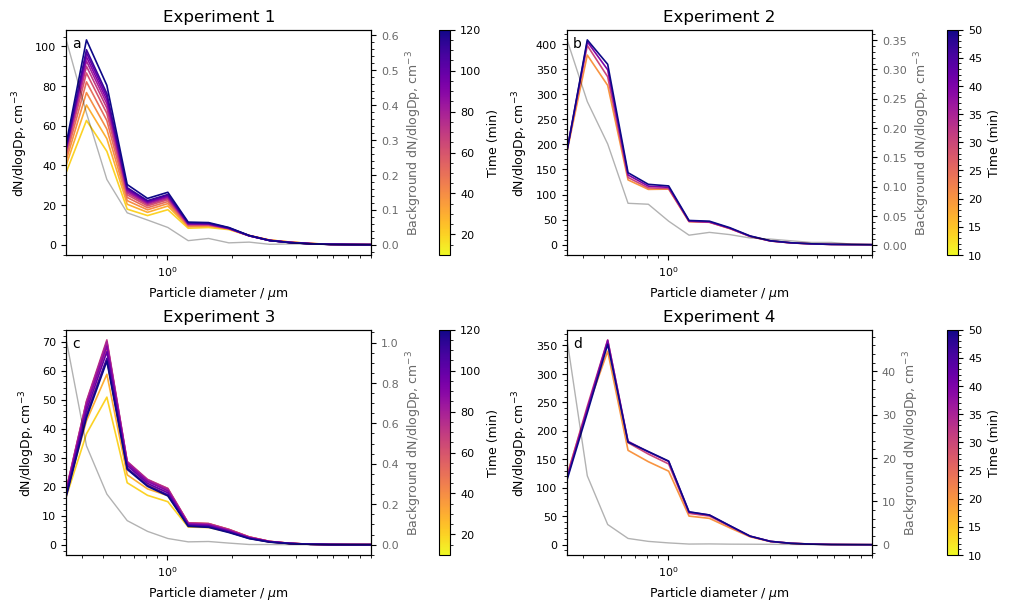

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)

for i, key in enumerate(OPS_dict_keys):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_running_mean(fig, ax, OPS_running_number[key], OPS_mid_point, OPS_cut_point, ax_labels[:2], 10, True)

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform=ax.transAxes, fontsize=10)

fig.savefig('Running_mean/OPS_running_number.png', dpi=600)

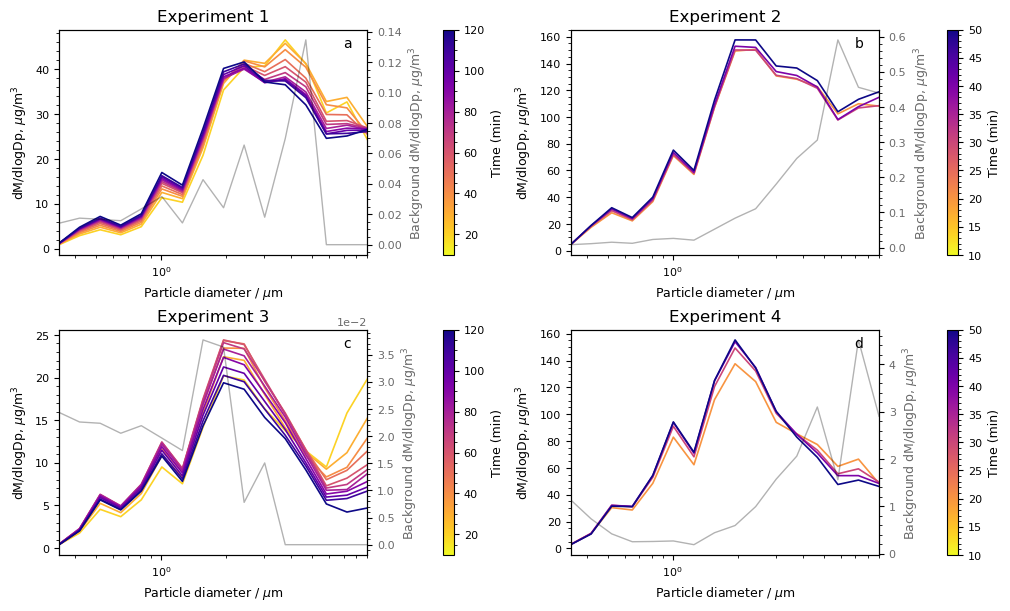

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)

for i, key in enumerate(OPS_dict_keys):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_running_mean(fig, ax, OPS_running_mass[key], OPS_mid_point, OPS_cut_point, [ax_labels[0], ax_labels[2]], 10, True)

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.92, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.savefig('Running_mean/OPS_running_mass.png', dpi = 600)

In [8]:
NanoScan_dict_keys = ['2024-10-16_NanoScan', '2024-10-16_NanoScan', '2024-10-17_NanoScan', '2024-10-17_NanoScan']
NanoScan_bin_mean = []
for key in SMPS['2024-10-16_NanoScan'].keys()[3:16]:
    NanoScan_bin_mean.append(float(key) / 1000)
NanoScan_Bins = SMPS['2024-10-16_NanoScan'].keys()[3:16].to_list()
NS_cut_point = bin_edges(0.010, NanoScan_bin_mean)

NanoScan_running = {}
for i, key in enumerate(NanoScan_dict_keys):
    exp_number = str(i + 1)
    new_key = 'Exp' + exp_number
    mean_number, std, errors = bin_mean(timestamps_BG_before[i], SMPS[key], NanoScan_Bins, 'Time', None)
    bg_number = pd.DataFrame({'Background': mean_number}).T
    bg_number.columns = NanoScan_Bins
    exp_number = running_mean(SMPS[key], None, NanoScan_Bins, 'Time', '10T', 10, timestamps_exp[i])
    NanoScan_running[new_key] = pd.concat([bg_number, exp_number]).T

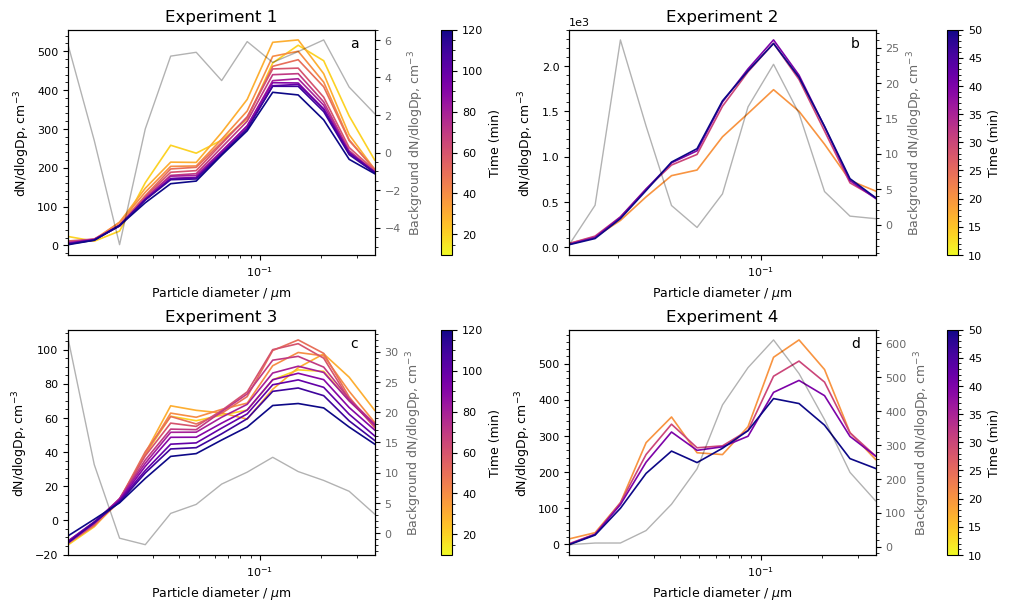

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)

for i, key in enumerate(OPS_dict_keys):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_running_mean(fig, ax, NanoScan_running[key], NanoScan_bin_mean, NS_cut_point, ax_labels[:2], 10, True)

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.92, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.savefig('Running_mean/NanoScan_running.png', dpi = 600)

In [10]:
APS_running_number = {}
APS_running_mass = {}
for i, key in enumerate(APS_dict_keys):
    exp_number = str(i + 1)
    new_key = 'Exp' + exp_number
    mean_number, std, errors = bin_mean(timestamps_BG_before[i], OPS_APS[key], APS_bins, 'Time', None)
    bg_number = pd.DataFrame({'Background': mean_number}).T
    bg_number.columns = APS_bins
    exp_number = running_mean(OPS_APS[key], None, APS_bins, 'Time', '10T', 10, timestamps_exp[i])
    APS_running_number[new_key] = pd.concat([bg_number, exp_number]).T
    mean_mass, std, errors = bin_mean(timestamps_BG_before[i], APS_mass_conc[key], APS_bins, 'Time', None)
    bg_mass = pd.DataFrame({'Background': mean_mass}).T
    bg_mass.columns = APS_bins
    exp_mass = running_mean(APS_mass_conc[key], None, APS_bins, 'Time', '10T', 10, timestamps_exp[i])
    APS_running_mass[new_key] = pd.concat([bg_mass, exp_mass]).T

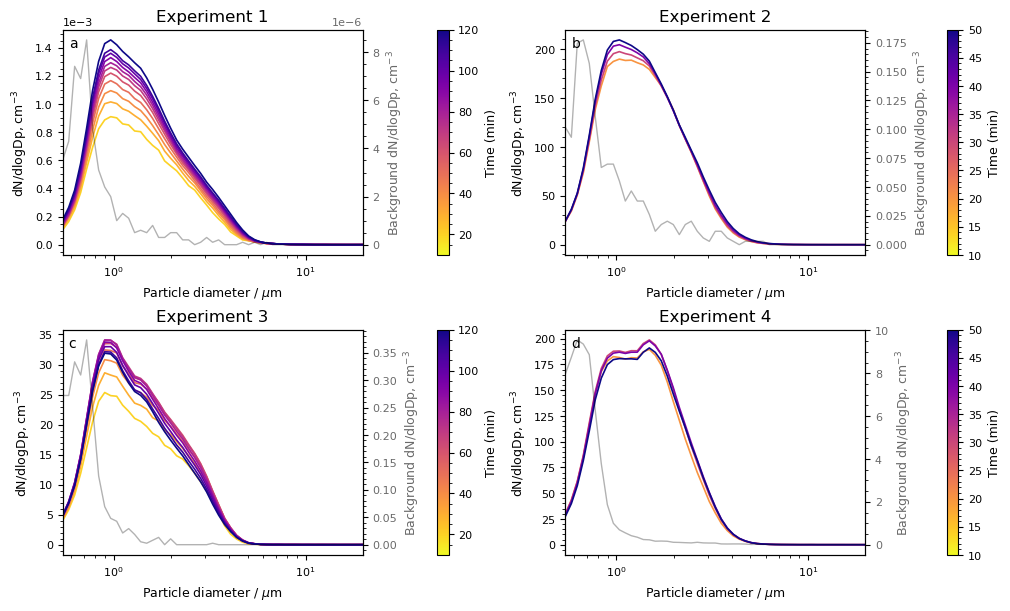

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)

for i, key in enumerate(OPS_dict_keys):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_running_mean(fig, ax, APS_running_number[key], APS_bin_mean, None, ax_labels[:2], 10, True)

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.savefig('Running_mean/APS_running_number.png', dpi = 600)

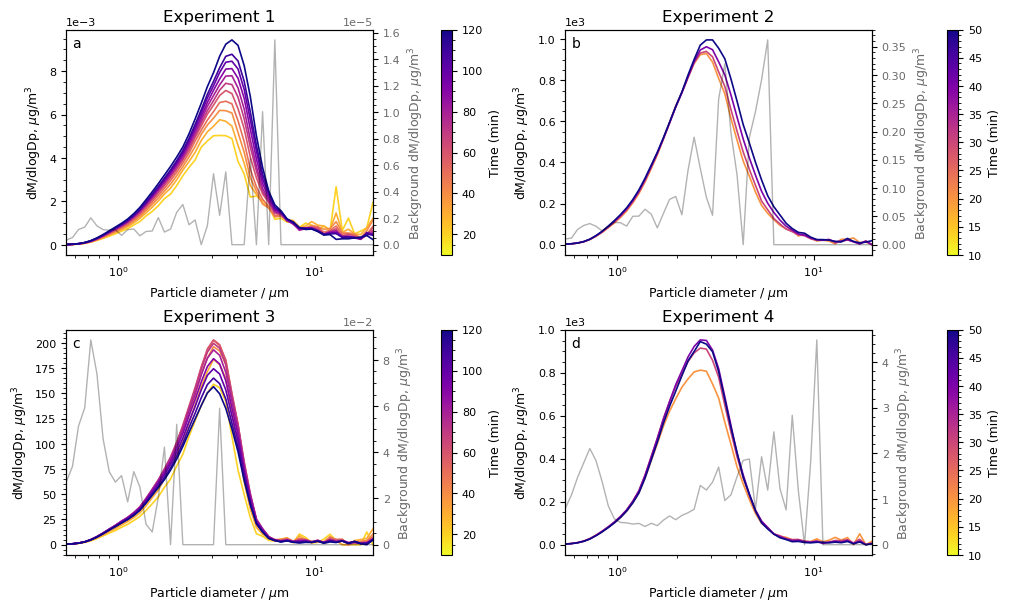

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)

for i, key in enumerate(OPS_dict_keys):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_running_mean(fig, ax, APS_running_mass[key], APS_bin_mean, None, [ax_labels[0], ax_labels[2]], 10, True)

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.savefig('Running_mean/APS_running_mass.png', dpi = 600)

In [13]:
SMPS_dict_keys = ['20241016_SMPS', '20241016_SMPS_2_exp', '20241017_SMPS', '20241017_SMPS']
SMPS_bins = SMPS['20241016_SMPS'].keys()[4:117].to_list()
SMPS_bin_mean = []
for key in SMPS['20241016_SMPS'].keys()[4:117]:
    SMPS_bin_mean.append(float(key) / 1000)
SMPS_cut_point = bin_edges(0.010, SMPS_bin_mean)

SMPS_running = {}
for i, key in enumerate(SMPS_dict_keys):
    exp_number = str(i + 1)
    new_key = 'Exp' + exp_number
    mean_number, std, errors = bin_mean(timestamps_BG_before[i], SMPS[key], SMPS_bins, 'Time', None)
    bg_number = pd.DataFrame({'Background': mean_number}).T
    bg_number.columns = SMPS_bins
    exp_number = running_mean(SMPS[key], None, SMPS_bins, 'Time', '10T', 10, timestamps_exp[i])
    SMPS_running[new_key] = pd.concat([bg_number, exp_number]).T

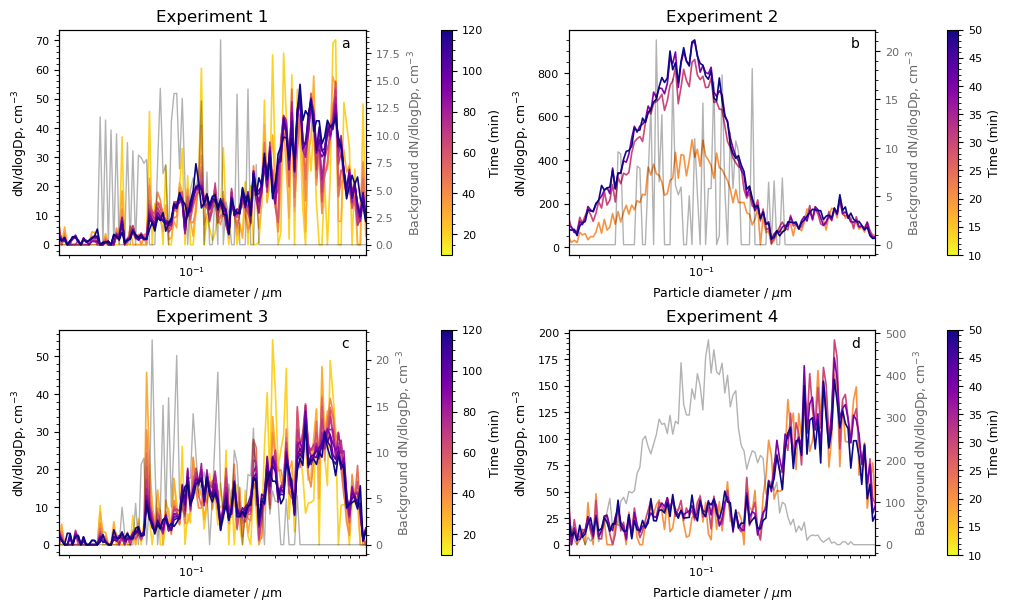

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)

for i, key in enumerate(OPS_dict_keys):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_running_mean(fig, ax, SMPS_running[key], SMPS_bin_mean, None, ax_labels[:2], 10, True)

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.92, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.savefig('Running_mean/SMPS_running.png', dpi = 600)

In [15]:
timestamps = [timestamps_BG_before, timestamps_increase, timestamps_exp]
sizes = ['1 um', '2.5 um', '4 um', '10 um']
OPS_cut_point = [7, 11, 13, 17]

OPS_binned_number, OPS_binned_mass = binned_mean(timestamps, OPS_APS, OPS_mass_conc, OPS_dict_keys, sizes, [1, 1], OPS_cut_point, 'Time', True)

for key in OPS_dict_keys:
    OPS_binned_number[key]['2.5/10'] = OPS_binned_number[key]['2.5 um'] / OPS_binned_number[key]['10 um']
    OPS_binned_number[key]['1/10'] = OPS_binned_number[key]['1 um'] / OPS_binned_number[key]['10 um']
    OPS_binned_number[key].to_csv(key + '_number_OPS.csv')
    print(key, ' number')
    display(OPS_binned_number[key])
    OPS_binned_mass[key]['2.5/10'] = OPS_binned_mass[key]['2.5 um'] / OPS_binned_mass[key]['10 um']
    OPS_binned_mass[key]['1/10'] = OPS_binned_mass[key]['1 um'] / OPS_binned_mass[key]['10 um']
    OPS_binned_mass[key].to_csv(key + '_mass_OPS.csv')
    print(key, ' mass')
    display(OPS_binned_mass[key])

Exp1  number


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.129777,0.133776,0.134076,0.134276,0.996277,0.966493
Increase,6.228450,7.076335,7.197446,7.248330,0.976271,0.859294
2024-10-16 10:40:00,18.717572,21.503736,21.862769,21.965381,0.978983,0.852140
2024-10-16 10:50:00,20.972046,23.933103,24.293183,24.398884,0.980910,0.859549
2024-10-16 11:00:00,22.666988,25.695510,26.047162,26.149859,0.982625,0.866811
2024-10-16 11:10:00,24.140056,27.220283,27.559703,27.656431,0.984230,0.872855
2024-10-16 11:20:00,25.362235,28.495837,28.826047,28.920065,0.985331,0.876977
2024-10-16 11:30:00,26.260250,29.421983,29.743455,29.835112,0.986153,0.880179
2024-10-16 11:40:00,26.975657,30.164175,30.479576,30.568631,0.986769,0.882462
2024-10-16 11:50:00,27.553980,30.782697,31.096156,31.183589,0.987144,0.883605


Exp1  mass


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.011336,0.025316,0.033673,0.046485,0.544609,0.243862
Increase,0.817429,3.973045,6.783264,13.725703,0.289460,0.059555
2024-10-16 10:40:00,2.601203,12.792336,21.103170,33.331750,0.383788,0.078040
2024-10-16 10:50:00,2.902831,13.619667,21.913768,34.767067,0.391740,0.083494
2024-10-16 11:00:00,3.121883,13.964412,22.048784,34.395093,0.406000,0.090765
2024-10-16 11:10:00,3.309480,14.215092,21.987684,33.724410,0.421508,0.098133
2024-10-16 11:20:00,3.470181,14.441016,21.982281,33.502746,0.431040,0.103579
2024-10-16 11:30:00,3.584364,14.570139,21.900414,33.187182,0.439029,0.108004
2024-10-16 11:40:00,3.682665,14.698801,21.881376,32.912054,0.446608,0.111894
2024-10-16 11:50:00,3.764996,14.887981,22.018208,32.878639,0.452816,0.114512


Exp2  number


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.090530,0.097165,0.098892,0.100073,0.970935,0.904632
Increase,27.069765,30.170878,30.458102,30.555387,0.987416,0.885924
2024-10-16 15:00:00,117.148931,130.489234,131.580434,131.907703,0.989247,0.888113
2024-10-16 15:10:00,121.698229,135.117122,136.212238,136.533024,0.989630,0.891346
2024-10-16 15:20:00,124.741615,138.374252,139.491559,139.815664,0.989691,0.892186
2024-10-16 15:30:00,127.080184,141.109214,142.265640,142.604386,0.989515,0.891138


Exp2  mass


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.009239,0.034779,0.076111,0.246616,0.141026,0.037465
Increase,3.918173,14.365036,20.967232,33.519871,0.428553,0.116891
2024-10-16 15:00:00,17.169554,61.375789,86.027017,128.201382,0.478745,0.133926
2024-10-16 15:10:00,17.647981,61.975704,86.714713,128.071827,0.483914,0.137798
2024-10-16 15:20:00,18.137787,63.168375,88.396897,130.559076,0.483830,0.138924
2024-10-16 15:30:00,18.603031,65.067250,91.224300,135.313755,0.480862,0.137481


Exp3  number


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.187552,0.191218,0.191301,0.191301,0.999564,0.980401
Increase,3.996522,4.417046,4.457596,4.486020,0.984625,0.890884
2024-10-17 10:20:00,15.100430,16.871709,17.001581,17.036279,0.990340,0.886369
2024-10-17 10:30:00,17.050969,19.021659,19.161723,19.193174,0.991064,0.888387
2024-10-17 10:40:00,18.347435,20.432992,20.579889,20.608856,0.991467,0.890269
2024-10-17 10:50:00,19.256490,21.413099,21.566705,21.595987,0.991531,0.891670
2024-10-17 11:00:00,19.798254,21.970951,22.125504,22.153588,0.991756,0.893682
2024-10-17 11:10:00,19.926573,22.075850,22.229506,22.256640,0.991877,0.895309
2024-10-17 11:20:00,19.708974,21.802814,21.951993,21.978061,0.992026,0.896757
2024-10-17 11:30:00,19.276659,21.291974,21.434529,21.459282,0.992203,0.898290


Exp3  mass


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.012504,0.021952,0.023385,0.023385,0.938705,0.534716
Increase,0.591408,1.983490,2.932314,8.523682,0.232703,0.069384
2024-10-17 10:20:00,2.431874,8.302408,11.168200,16.558697,0.501393,0.146864
2024-10-17 10:30:00,2.762885,9.301472,12.358093,16.828291,0.552728,0.164181
2024-10-17 10:40:00,2.978184,9.889006,13.100539,17.058513,0.579711,0.174586
2024-10-17 10:50:00,3.127383,10.255008,13.623931,17.436741,0.588126,0.179356
2024-10-17 11:00:00,3.209713,10.363711,13.742945,17.251127,0.600756,0.186058
2024-10-17 11:10:00,3.226822,10.277919,13.641458,16.977801,0.605374,0.190061
2024-10-17 11:20:00,3.187697,10.032643,13.303355,16.477916,0.608854,0.193453
2024-10-17 11:30:00,3.113886,9.679009,12.805648,15.787420,0.613084,0.197238


Exp4  number


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,6.717858,6.772595,6.787205,6.795411,0.996642,0.988587
Increase,47.284660,52.968850,53.367198,53.505846,0.989964,0.883729
2024-10-17 14:30:00,108.595121,121.958872,122.723337,122.921858,0.992166,0.883448
2024-10-17 14:40:00,114.475776,129.009586,129.809985,129.995393,0.992417,0.880614
2024-10-17 14:50:00,114.618498,129.654308,130.461623,130.640436,0.992452,0.877359
2024-10-17 15:00:00,113.027899,128.148811,128.951782,129.119061,0.992486,0.875377


Exp4  mass


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.291153,0.501866,0.847576,1.997010,0.251309,0.145794
Increase,7.938843,26.008778,35.065951,53.348071,0.487530,0.148812
2024-10-17 14:30:00,19.436831,60.856097,77.919512,102.028830,0.596460,0.190503
2024-10-17 14:40:00,21.038954,65.823108,83.482097,106.081381,0.620496,0.198328
2024-10-17 14:50:00,21.430717,67.569833,85.357212,107.036190,0.631280,0.200219
2024-10-17 15:00:00,21.371222,67.689124,85.303844,105.528493,0.641430,0.202516


In [16]:
timestamps = [timestamps_BG_before, timestamps_increase, timestamps_exp]
APS_cut_point = [11, 23, 30, 42]
sizes = ['1 um', '2.5 um', '4 um', '10 um']

APS_binned_number, APS_binned_mass = binned_mean(timestamps, OPS_APS, APS_mass_conc, APS_dict_keys, sizes, [2, 2], APS_cut_point, 'Time', True)

for i, key in enumerate(OPS_dict_keys):
    APS_binned_number[key]['2.5/10'] = APS_binned_number[key]['2.5 um'] / APS_binned_number[key]['10 um']
    APS_binned_number[key]['1/10'] = APS_binned_number[key]['1 um'] / APS_binned_number[key]['10 um']
    APS_binned_number[key].to_csv(key + '_number_APS.csv')
    print('Exp', i+1, ' number')
    display(APS_binned_number[key])
    APS_binned_mass[key]['2.5/10'] = APS_binned_mass[key]['2.5 um'] / APS_binned_mass[key]['10 um']
    APS_binned_mass[key]['1/10'] = APS_binned_mass[key]['1 um'] / APS_binned_mass[key]['10 um']
    APS_binned_mass[key].to_csv(key + '_number_APS.csv')
    print('Exp', i+1, ' mass')
    display(APS_binned_mass[key])

Exp 1  number


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.000040,0.000047,0.000048,0.000048,0.979275,0.838285
Increase,0.001972,0.004501,0.004938,0.004994,0.901334,0.394974
2024-10-16 10:40:00,0.005534,0.013550,0.015197,0.015384,0.880777,0.359696
2024-10-16 10:50:00,0.006133,0.015035,0.016854,0.017059,0.881313,0.359520
2024-10-16 11:00:00,0.006555,0.016059,0.018014,0.018235,0.880648,0.359475
2024-10-16 11:10:00,0.006948,0.016994,0.019056,0.019297,0.880655,0.360072
2024-10-16 11:20:00,0.007253,0.017745,0.019919,0.020190,0.878912,0.359237
2024-10-16 11:30:00,0.007477,0.018293,0.020550,0.020843,0.877674,0.358737
2024-10-16 11:40:00,0.007674,0.018750,0.021090,0.021401,0.876129,0.358593
2024-10-16 11:50:00,0.007940,0.019278,0.021701,0.022037,0.874771,0.360315


Exp 1  mass


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.000010,0.000027,0.000043,0.000075,0.358392,0.134618
Increase,0.000604,0.007466,0.016284,0.023106,0.323110,0.026133
2024-10-16 10:40:00,0.001690,0.023688,0.056865,0.078572,0.301478,0.021509
2024-10-16 10:50:00,0.001879,0.026126,0.062780,0.086425,0.302293,0.021741
2024-10-16 11:00:00,0.002011,0.027797,0.067212,0.092205,0.301464,0.021815
2024-10-16 11:10:00,0.002136,0.029307,0.070912,0.097710,0.299936,0.021857
2024-10-16 11:20:00,0.002231,0.030529,0.074350,0.103865,0.293926,0.021478
2024-10-16 11:30:00,0.002300,0.031421,0.076844,0.108330,0.290046,0.021232
2024-10-16 11:40:00,0.002362,0.032152,0.079236,0.112288,0.286338,0.021032
2024-10-16 11:50:00,0.002440,0.032939,0.081656,0.117049,0.281411,0.020846


Exp 2  number


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,1.021069,1.355608,1.425424,1.439970,0.941414,0.709091
Increase,349.886340,951.309147,1039.904722,1047.963228,0.907770,0.333873
2024-10-16 15:00:00,958.121615,2927.476905,3297.511130,3330.780866,0.878916,0.287657
2024-10-16 15:10:00,986.093922,2988.445593,3365.774055,3402.229323,0.878379,0.289838
2024-10-16 15:20:00,1017.779333,3053.674747,3442.632320,3484.486421,0.876363,0.292089
2024-10-16 15:30:00,1037.215206,3101.246266,3506.528190,3554.718442,0.872431,0.291785


Exp 2  mass


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.276752,1.151662,2.320689,3.399162,0.338808,0.081418
Increase,166.469080,1864.656958,3106.765594,3652.616109,0.510499,0.045575
2024-10-16 15:00:00,473.107618,6419.948689,11829.838376,13656.656536,0.470097,0.034643
2024-10-16 15:10:00,489.715445,6471.758669,12078.949233,14056.210010,0.460420,0.034840
2024-10-16 15:20:00,506.933658,6532.490483,12456.234882,14761.350322,0.442540,0.034342
2024-10-16 15:30:00,518.045379,6603.294438,12931.971121,15629.598017,0.422487,0.033145


Exp 3  number


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,2.053292,2.205288,2.207955,2.207955,0.998792,0.929952
Increase,45.563887,99.625216,112.157766,112.880951,0.882569,0.403645
2024-10-17 10:20:00,140.595603,370.088638,429.901861,433.392992,0.853933,0.324407
2024-10-17 10:30:00,156.800072,417.662061,486.127903,490.692611,0.851168,0.319548
2024-10-17 10:40:00,167.796112,450.496604,524.208206,529.428369,0.850911,0.316938
2024-10-17 10:50:00,175.394900,472.312175,548.693053,554.328141,0.852044,0.316410
2024-10-17 11:00:00,180.544881,484.803124,561.598390,567.356995,0.854494,0.318221
2024-10-17 11:10:00,184.599521,490.136352,565.803645,571.583263,0.857506,0.322962
2024-10-17 11:20:00,185.599502,487.395529,560.541047,566.129050,0.860927,0.327840
2024-10-17 11:30:00,183.996730,479.044030,548.990242,554.296137,0.864238,0.331947


Exp 3  mass


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.441405,0.645625,0.704640,0.704640,0.916247,0.626426
Increase,19.389688,179.423817,366.091591,427.186293,0.420013,0.045389
2024-10-17 10:20:00,65.731465,779.999317,1706.517083,1844.046287,0.422983,0.035645
2024-10-17 10:30:00,73.943205,887.197162,1972.135057,2137.516260,0.415060,0.034593
2024-10-17 10:40:00,79.661052,957.676697,2135.142354,2322.462503,0.412354,0.034300
2024-10-17 10:50:00,83.719337,1001.578794,2221.487610,2424.539108,0.413101,0.034530
2024-10-17 11:00:00,86.340166,1021.310808,2244.695426,2453.428690,0.416279,0.035192
2024-10-17 11:10:00,87.917323,1019.962336,2224.188847,2434.117229,0.419028,0.036119
2024-10-17 11:20:00,88.038697,1001.428512,2164.102949,2366.696360,0.423133,0.037199
2024-10-17 11:30:00,87.045708,973.142245,2082.037234,2274.341681,0.427879,0.038273


Exp 4  number


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,57.365272,60.648406,61.147595,61.323591,0.988990,0.935452
Increase,573.483751,1444.410427,1551.747924,1559.931033,0.925945,0.367634
2024-10-17 14:30:00,1012.648925,2992.842260,3312.477496,3333.910667,0.897697,0.303742
2024-10-17 14:40:00,1030.462850,3118.671718,3478.891790,3502.531324,0.890405,0.294205
2024-10-17 14:50:00,1013.055057,3100.712768,3477.010387,3501.348043,0.885577,0.289333
2024-10-17 15:00:00,973.723043,2991.865826,3362.023315,3385.988446,0.883602,0.287574


Exp 4  mass


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,11.581587,18.089643,27.200642,45.090393,0.401186,0.256853
Increase,257.554656,2632.118364,4094.952791,4580.836084,0.574593,0.056224
2024-10-17 14:30:00,475.446088,6402.012597,10851.593541,11866.515474,0.539502,0.040066
2024-10-17 14:40:00,487.296852,6858.022490,11903.653542,12986.135667,0.528103,0.037524
2024-10-17 14:50:00,481.426244,6918.383227,12214.429854,13301.900455,0.520105,0.036192
2024-10-17 15:00:00,463.976948,6701.729220,11933.829076,12967.472898,0.516811,0.035780
